In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Original Dataset

In [ ]:
og_data = np.load('/Volumes/MARI/ssdl_gps/correction_data/2018_2019/unique_correction_data_2018_2019_jan1_dec31.npz', mmap_mode='r')
og_epochs = og_data['matching_epochs']
og_final_clock_bias = og_data['matching_clock_bias']
og_broadcast_clock_bias = og_data['matching_poly_values']
og_correction_value = og_data['correction_vals']

In [ ]:
print(max(og_correction_value)/(1e-9))
print(min(og_correction_value)/(1e-9))

# Non-scaled Dataset

In [2]:
data = np.load('/Volumes/MARI/ssdl_gps/correction_data/2018_2019/continuous_unique_correction_data_2018_2019_jan1_dec31_clipped_015_9985.npz', mmap_mode='r')
epochs = data['matching_epochs']
final_clock_bias = data['matching_clock_bias']
broadcast_clock_bias = data['matching_poly_values']
correction_value = data['correction_vals']

# Analysis: Bias and Zero

In [23]:
print(max(correction_value))
print(min(correction_value))

1.8558951500325045e-06
-1.0602855236254594e-07


In [24]:
bias = np.mean(correction_value)
bias/1e-9

7.362001193358958

In [5]:
avg = np.full((correction_value.shape),bias)
mae_avg = mean_absolute_error(correction_value, avg)
mae_avg = mae_avg/(1e-9) # [ns]
mae_avg

12.32791012978455

In [6]:
zero = np.full((correction_value.shape),0)
mae_zero = mean_absolute_error(correction_value, zero)
mae_zero = mae_zero/(1e-9) # [ns]
mae_zero

7.811676472598203

# FFT

In [8]:
y = np.fft.fft(correction_value)
y

array([ 0.0154655 +3.12343399e-19j,  0.0034076 -1.22430538e-02j,
       -0.01048432-6.53723555e-03j, ..., -0.00883698-7.98807740e-03j,
       -0.01048432+6.53723555e-03j,  0.0034076 +1.22430538e-02j])

In [9]:
sample_rate = 1 / 30.0  # 1 sample every 30 seconds

In [10]:
N = len(correction_value)
magnitude = np.abs(y)
freq = np.fft.fftfreq(N, d=1/sample_rate)

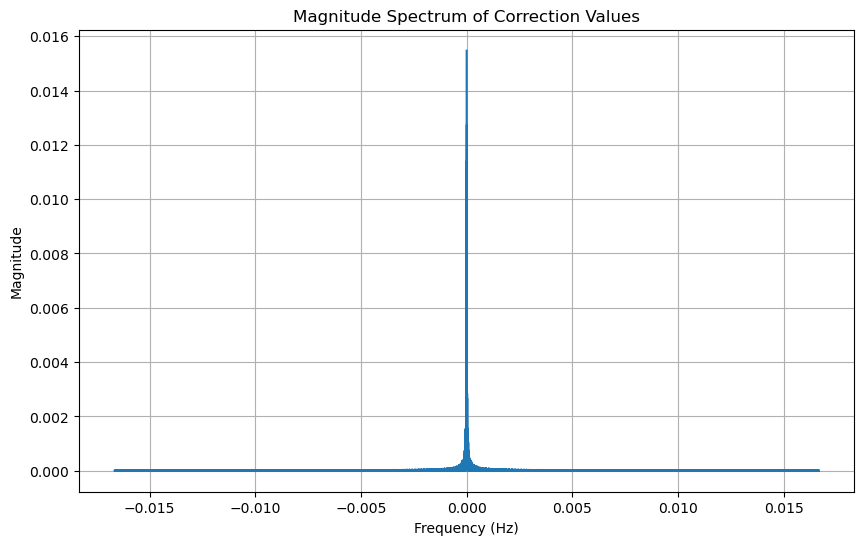

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Correction Values')
plt.grid(True)
plt.show()

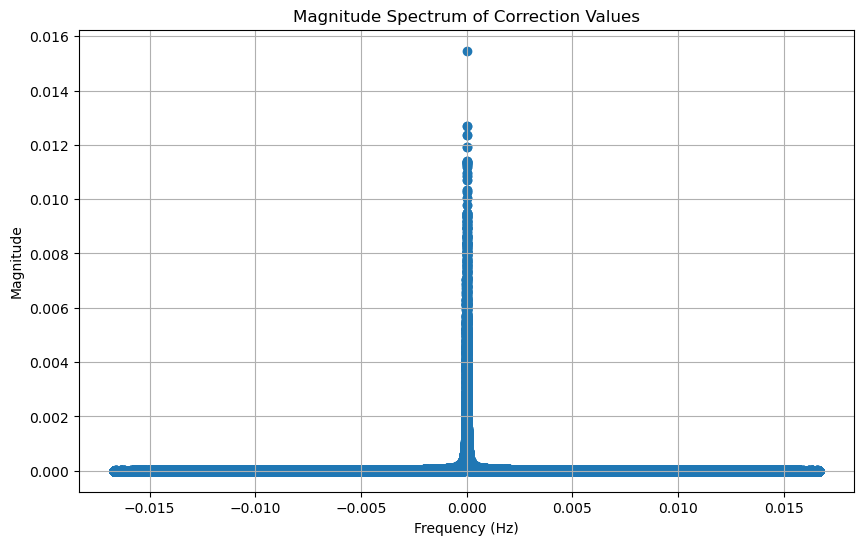

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Correction Values')
plt.grid(True)
plt.show()

In [14]:
no_bias = correction_value - avg

In [15]:
y = np.fft.fft(no_bias)
y

array([-6.53803556e-18+8.08916465e-20j,  3.40760343e-03-1.22430538e-02j,
       -1.04843219e-02-6.53723555e-03j, ...,
       -8.83697761e-03-7.98807740e-03j, -1.04843219e-02+6.53723555e-03j,
        3.40760343e-03+1.22430538e-02j])

In [16]:
sample_rate = 1 / 30.0  # 1 sample every 30 seconds

In [17]:
N = len(correction_value)
magnitude = np.abs(y)
freq = np.fft.fftfreq(N, d=1/sample_rate)

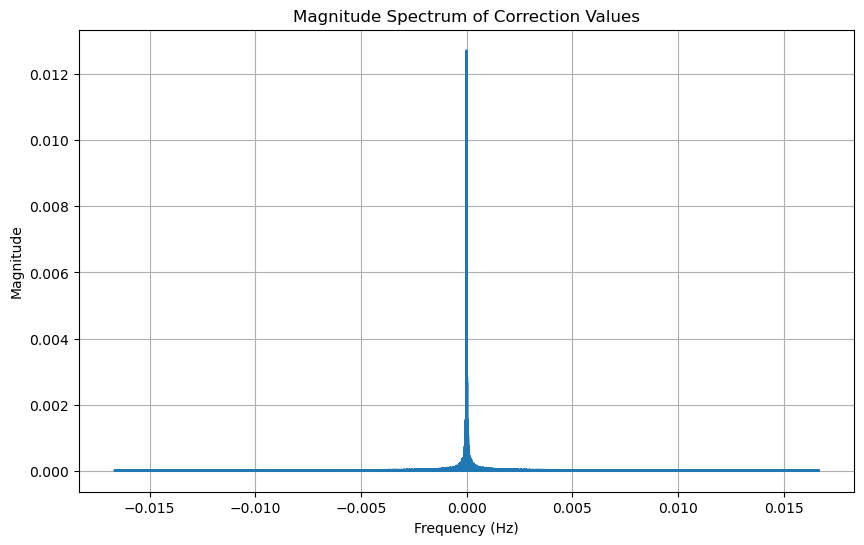

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Correction Values')
plt.grid(True)
plt.show()

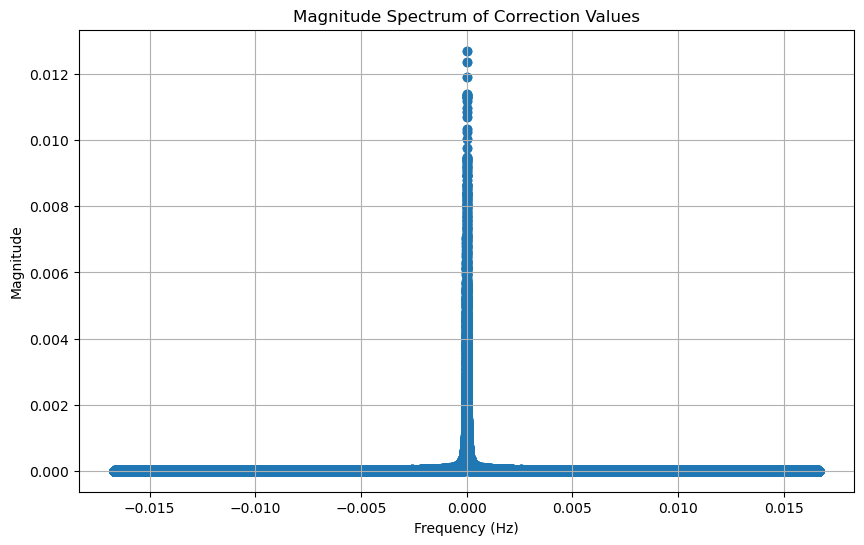

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Correction Values')
plt.grid(True)
plt.show()